# Comparison XUE3M e Mini-Batching

Este notebook tem como objetivo, analisar os resultados produzidos pelos experimentos executados utilizando o MOA-MiniBatching e também a execução do MOA utilizando as técnicas de DVFS e DPM que foram utilizadas no XUE3M. Primeiro, iremos analisar os resultados encontrados pelo MiniBatching em precisão e revocação, gastos em Joules por instancia (JPI) e o consumo entre a Instancia por Segundo (IPS). Em seguida, iremos analisar esses mesmos dados porém para a execução do MOA sem as adaptações feitas para o mini-batching e também a versão paralelizavel. 

# Questão

Dado os melhores resultados utilizando as técnicas de DPM e DVFS e a utlização do Mini-Batching quais destes métodos apresentam o melhor desempenho energético?


/Users/reginaldoluisdeluna/Documents/Ufscar/comparison-xue3m-minibatching
/Users/reginaldoluisdeluna/Documents/Ufscar/comparison-xue3m-minibatching/results
/Users/reginaldoluisdeluna/Documents/Ufscar/comparison-xue3m-minibatching


/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/2209187601.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filename, index_col=False)
/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df["algorithm"].str.replace("OB$", "OBSequential")
/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df['algorithm'].str.replace("Adwin$", "AdwinSequential")
/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df['algorithm'].str.replace("SRP$", "SRPSequential")

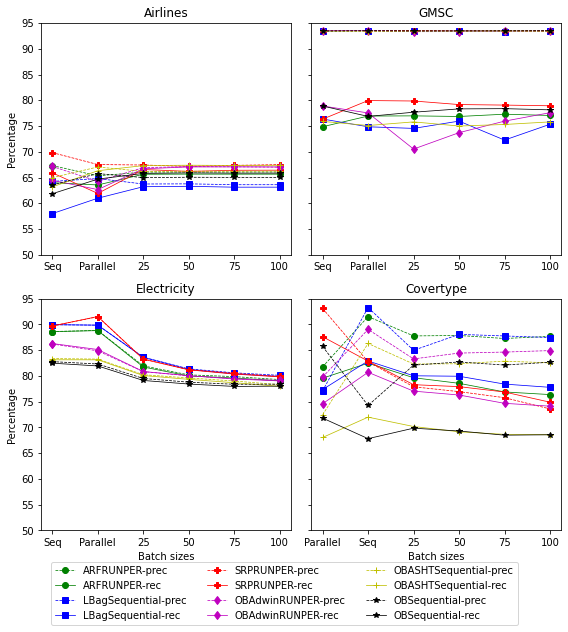

moaDF: 288    mdf: 288     sshDF: 288



----------------- {'minimum': '600', 'maximum': '1200'} -----------------


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


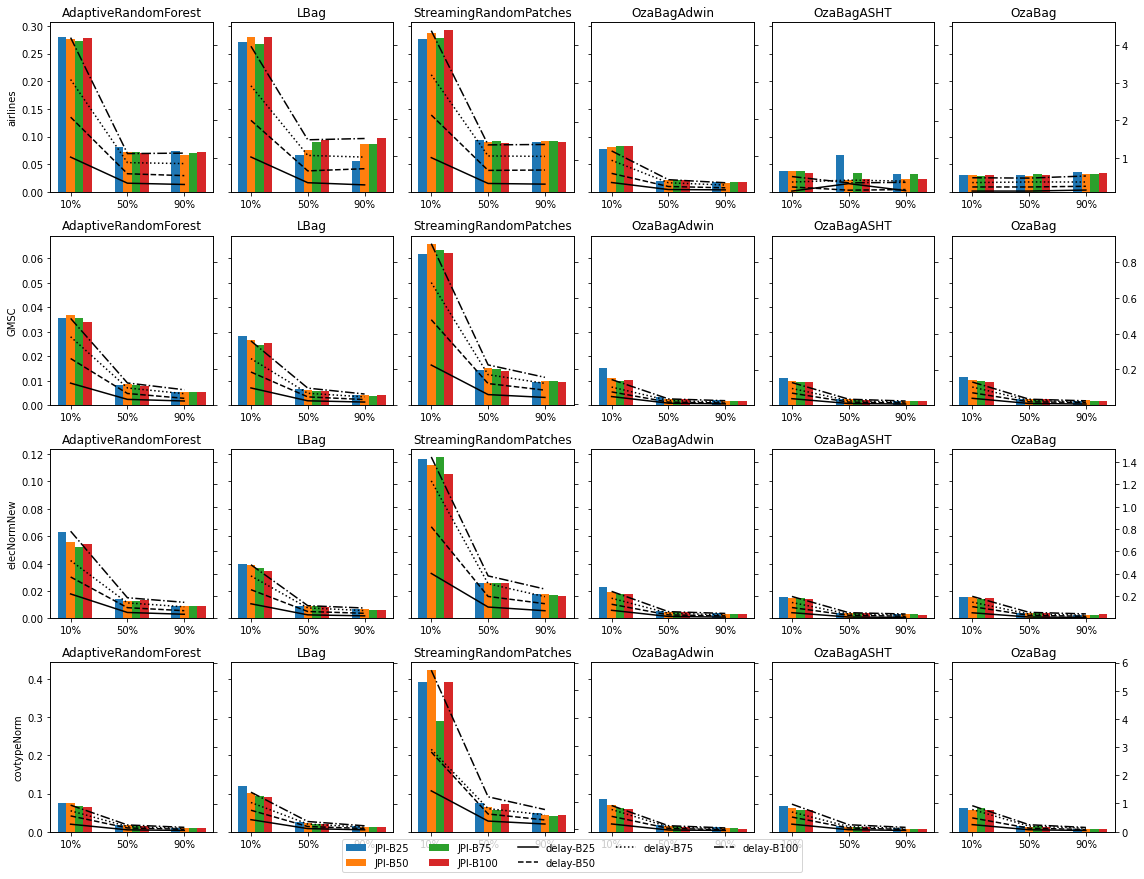




----------------- {'minimum': '600', 'maximum': '1200'} -----------------
498.6450141081419
moaDF: 288    mdf: 288     sshDF: 288



----------------- {'minimum': '600', 'maximum': '1200'} -----------------


/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df["algorithm"].str.replace("OB$", "OBSequential")
/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df['algorithm'].str.replace("Adwin$", "AdwinSequential")
/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df['algorithm'].str.replace("SRP$", "SRPSequential")
/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df['algorithm'].str.replace("OBASHT$", "OBASHTSequent

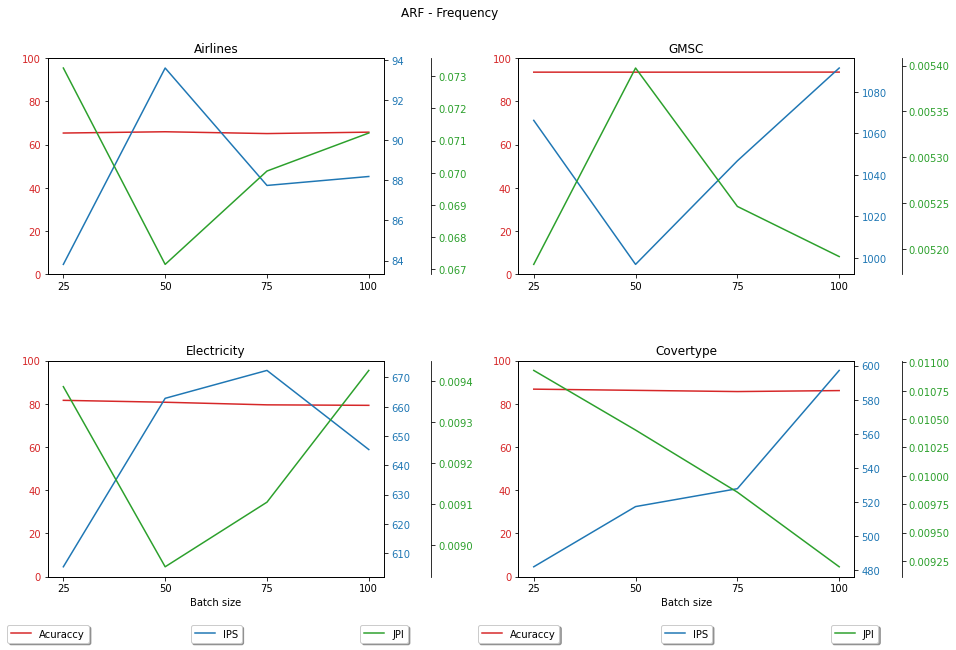

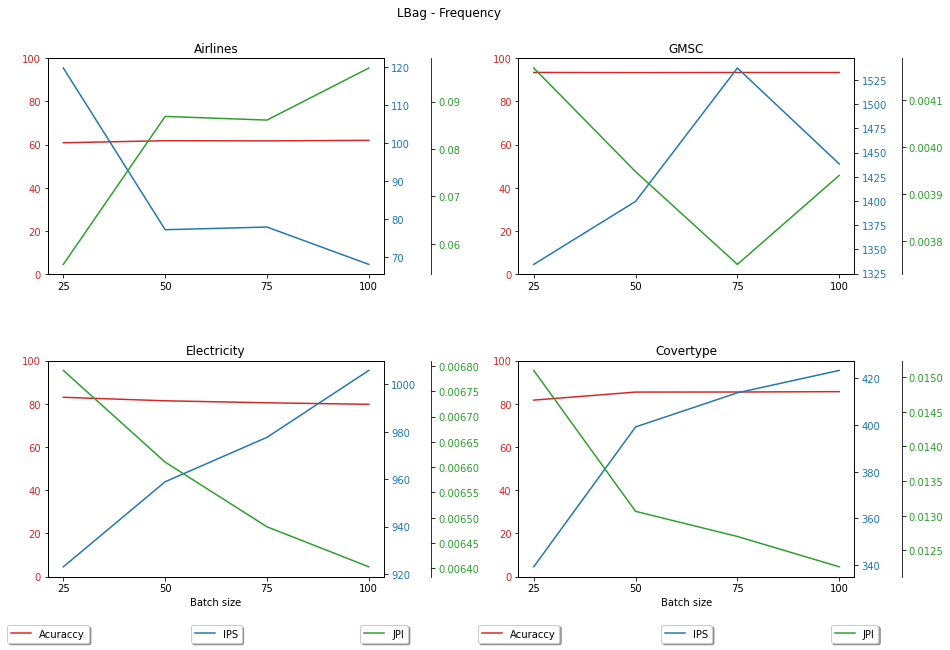

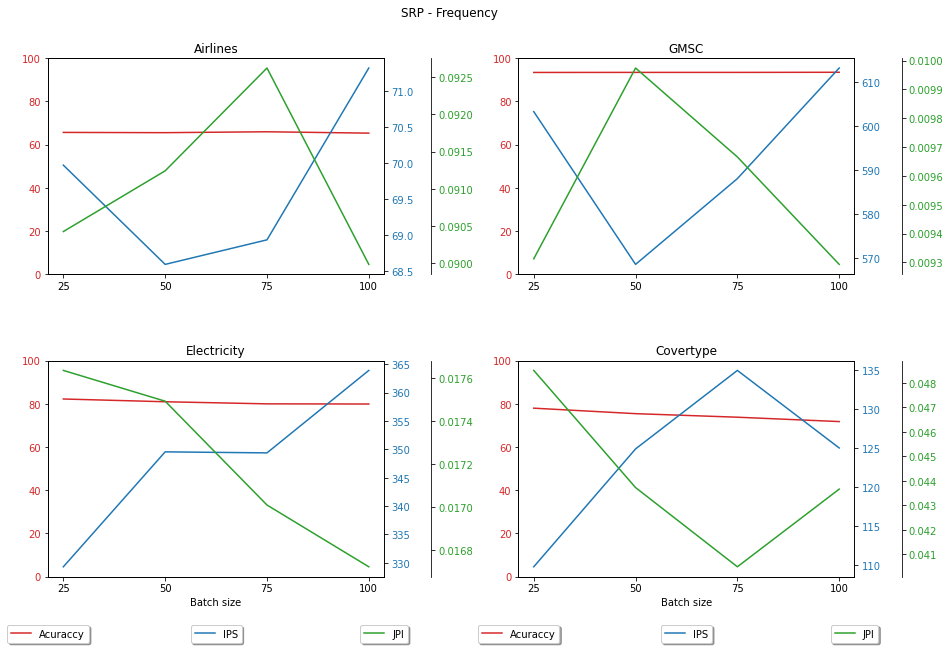

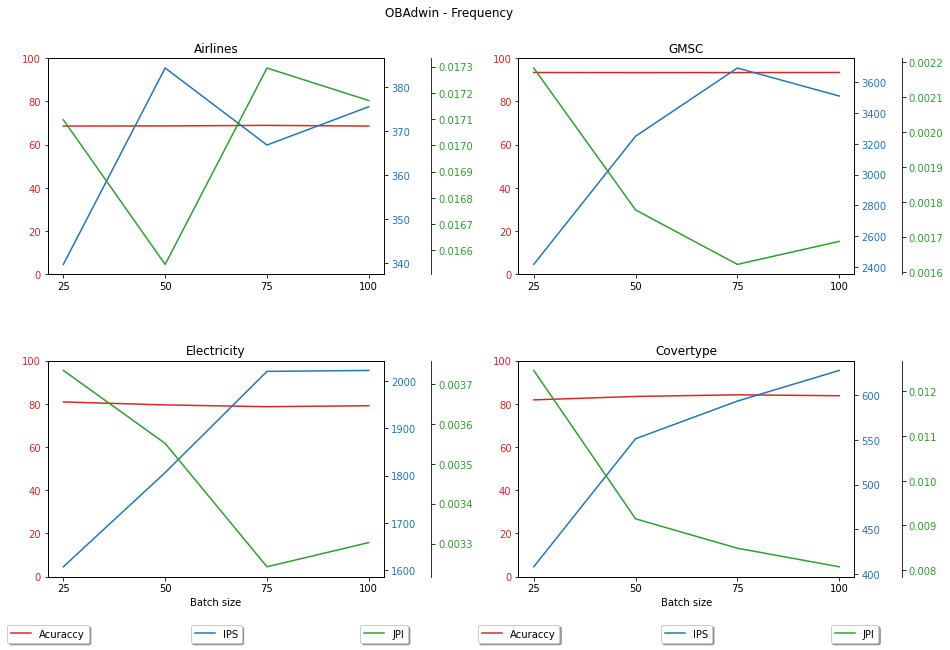

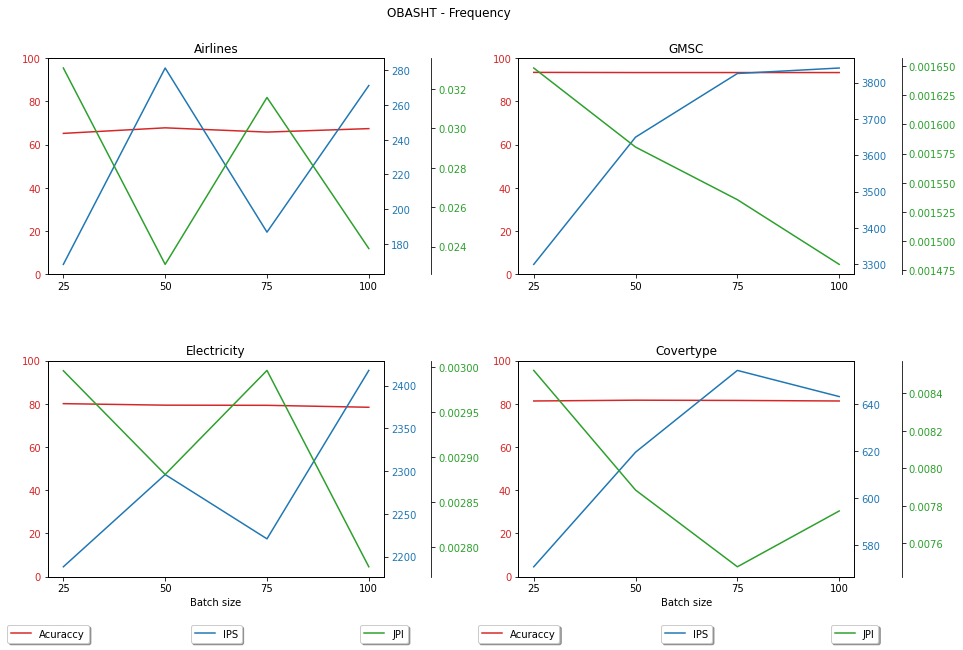

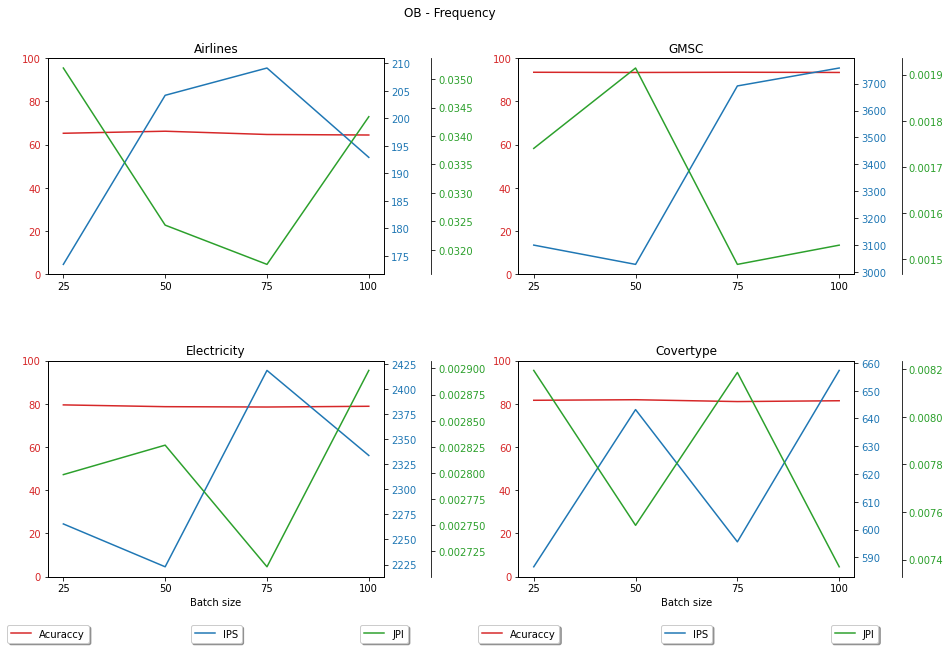

In [4]:
%run "/Users/reginaldoluisdeluna/Documents/Ufscar/comparison-xue3m-minibatching/notebooks/MOA-MiniBatching.ipynb"

Pegando o dataset Electricity e sua precisão e revocação podemos observar que ao utilizar o os batch-sizes de tamanho entre 25 à 100 eles pedem um pouco em relação ao MOA comum e ao MOA paralelo. No dataset GMSC para o algoritmo OzaBag temos uma linha estável de precisão e recall para todos os cenários. O algoritmo OzaBag também em outros datasets é o que mais tem estabilidade ao utilizar o mini-batching ou sem ele. Já no dataset covertype podemos observar uma linha um pouco mais de instabilidade ao adicionamos a paralelização no algoritmos, alguns casos descem como o Ozabag e outros como o LBag melhoram a precisão porém com os mini-batchs esses dados são estabilizados.

Agora analisando a relação entre o número de instancias processadas por segundo (IPS) o JPI e a acurácia entre esses valores. Primeiro vamos analisar a linha azul que representa o IPS, individualmente irei analisar o dataset Airlines nos algoritmos Adaptive Random Forest (ARF), OzaBag (OB), LBag (LB). Para o ARF o IPS inicia com um processamento de 84 instancias e evolui para 94 no batch-size de tamanho 50 e cai para 88 no batch-size 75 e 100. A linha verde representa o JPI neste primeiro algoritmo observamos o comportamento de queda no maior numero de IPS mas no batch-size de 75 e 100 um novo aumento. No algoritmo OB temos um aumento no número de IPS em relação ao tamnho do batch-size somente caindo no 100. Já o número do JPI diminui em relação ao aumento do IPS exceto na quanto o IPS cai no batch-size 100. Por último vamos analisar o LB, para este algoritmo a tendência do batch-size aumenta o IPS diminui e o JPI tende a crescer. Vendo esses casos podemos dizer que para os algoritmos ARF e OB a têndencia é quanto maior o IPS menor será o JPI já no LBAG o oposto aconteceu pelo menos no dataset airlines, quanto menor o IPS maior o JPI. Já em outros dasets ocorreu de o IPS maior trazer um menor JPI.


Neste cenário podemos observar que o tamanho do mini-batch não traz grande diferença no consumo energético quando seu tamanho é menor ou maior, mas sim em relação ao seu padrão de comportamento sequencial já comprovado no artigo do Cassales. Nesta analise constatamos alguns comportamentos tais como quando a quantidade de IPS aumenta em determinados algoritmos temos uma tendencia que o JPI diminua e que existem algoritmos que são mais eficiente energéticamente e mantem a mesma linha de precisão e acurácia como o OzaBag.

/Users/reginaldoluisdeluna/Documents/Ufscar/comparison-xue3m-minibatching


/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3079571633.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filename, index_col=False)
/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df["algorithm"].str.replace("OB$", "OBSequential")
/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df['algorithm'].str.replace("Adwin$", "AdwinSequential")
/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df['algorithm'].str.replace("SRP$", "SRPSequential")

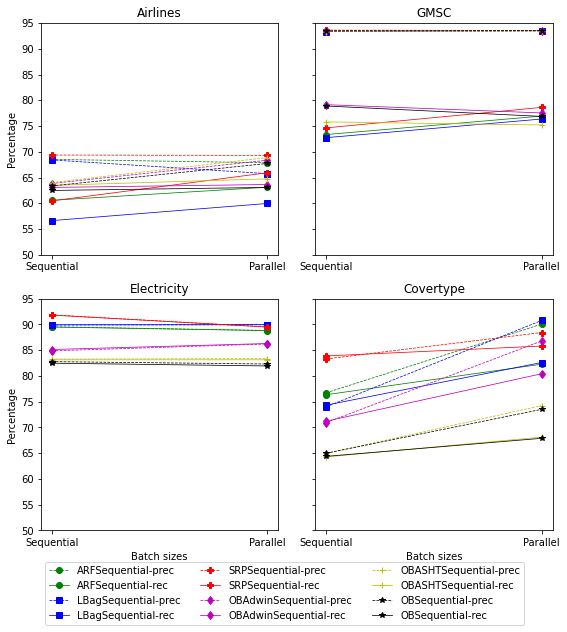

/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3079571633.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(filename, index_col=False)
/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df["algorithm"].str.replace("OB$", "OBSequential")
/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df['algorithm'].str.replace("Adwin$", "AdwinSequential")


/Users/reginaldoluisdeluna/Documents/Ufscar/comparison-xue3m-minibatching


/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df['algorithm'].str.replace("SRP$", "SRPSequential")
/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df['algorithm'].str.replace("OBASHT$", "OBASHTSequential")
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


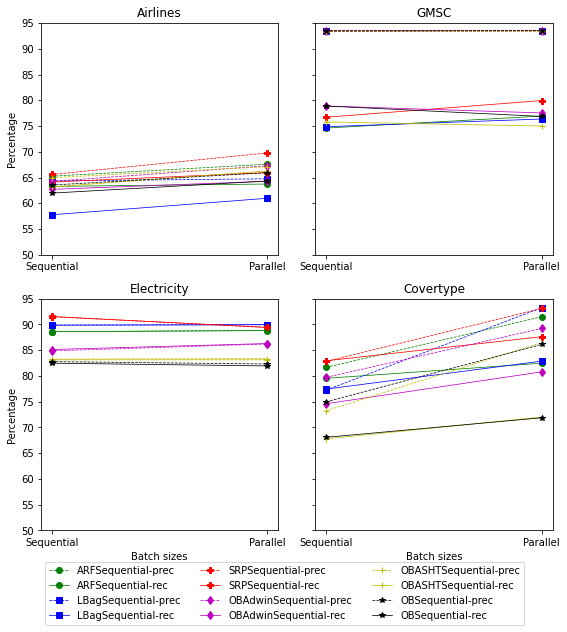

moaDF: 144    mdf: 144     sshDF: 144
moaDF: 144    mdf: 144     sshDF: 144
moaDF: 144    mdf: 144     sshDF: 144
moaDF: 144    mdf: 144     sshDF: 144


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


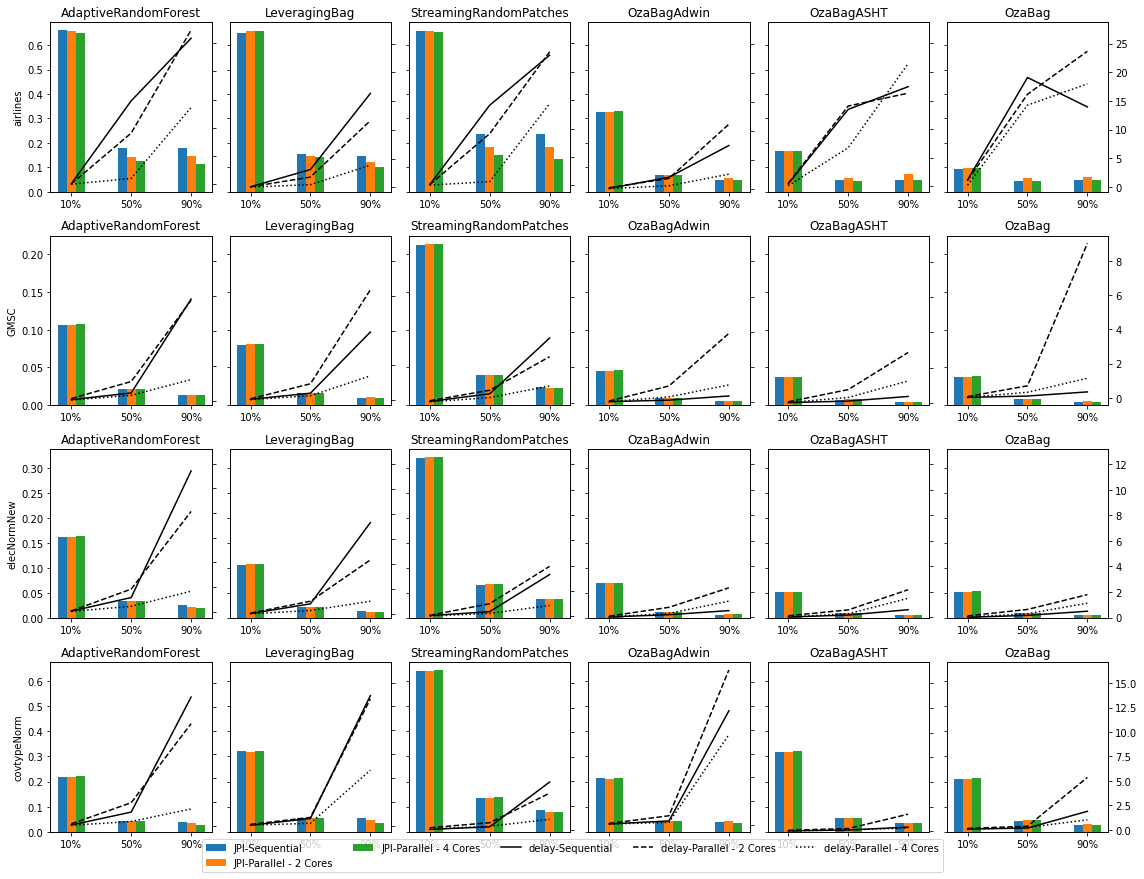

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


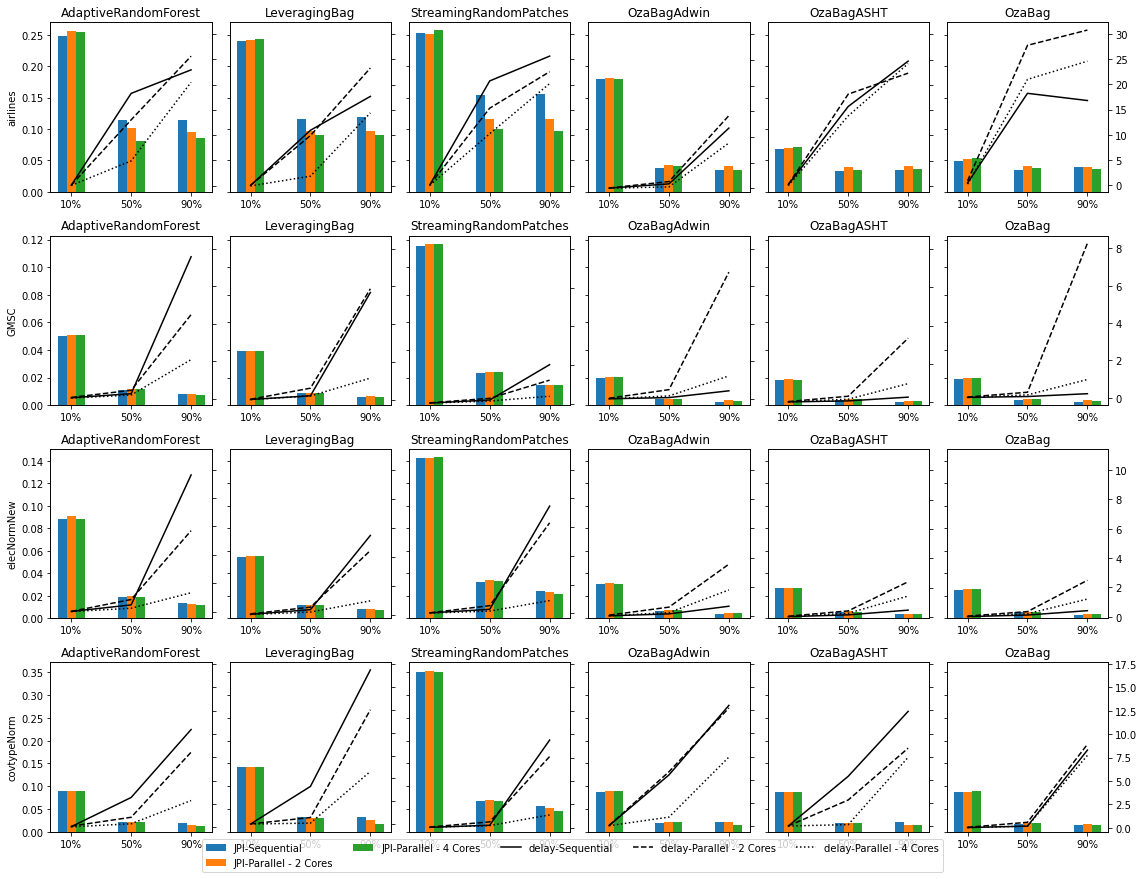

moaDF: 144    mdf: 144     sshDF: 144
moaDF: 144    mdf: 144     sshDF: 144



----------------- {'minimum': '600', 'maximum': '600', 'cores': 2} -----------------


/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df["algorithm"].str.replace("OB$", "OBSequential")
/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df['algorithm'].str.replace("Adwin$", "AdwinSequential")
/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df['algorithm'].str.replace("SRP$", "SRPSequential")
/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df['algorithm'].str.replace("OBASHT$", "OBASHTSequent




----------------- {'minimum': '1200', 'maximum': '1200', 'cores': 2} -----------------


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


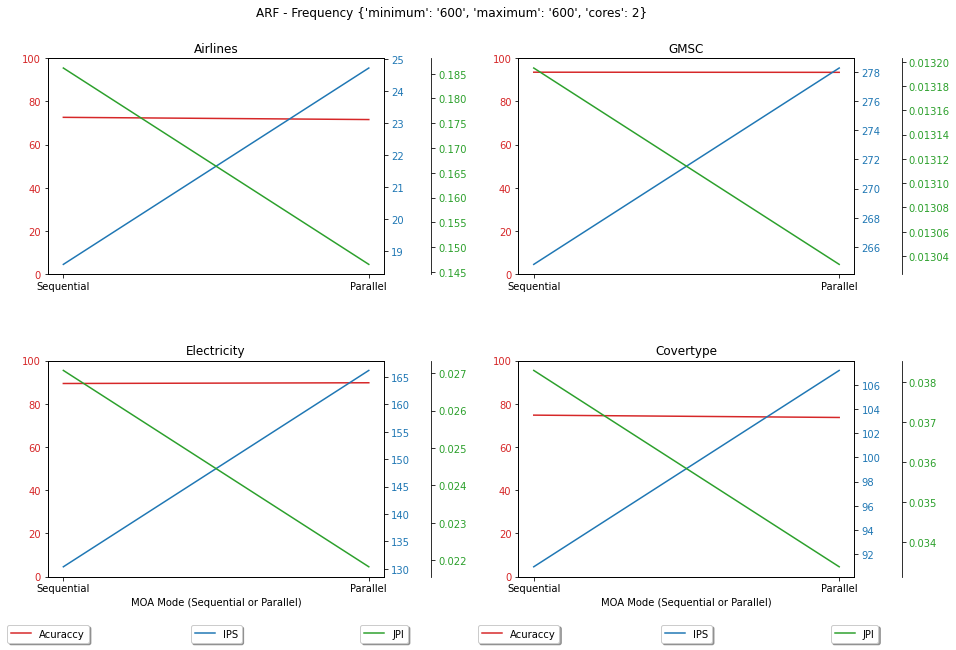

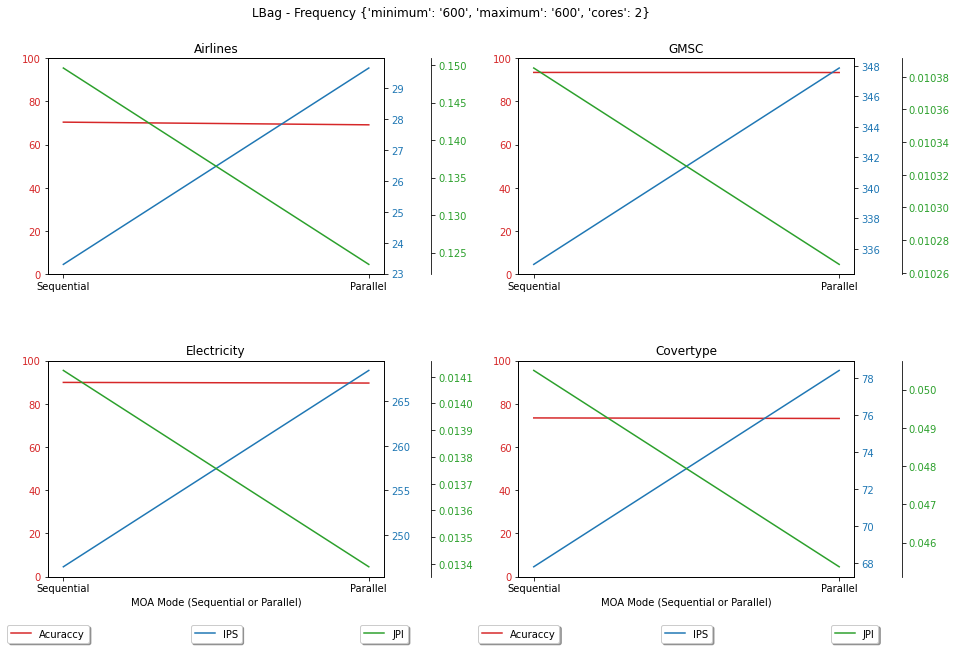

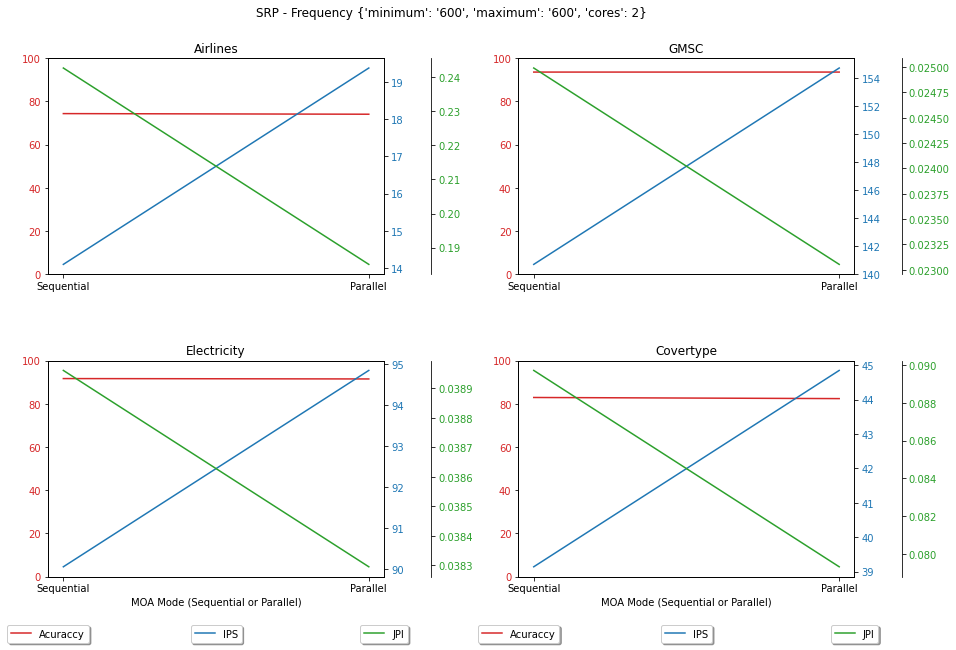

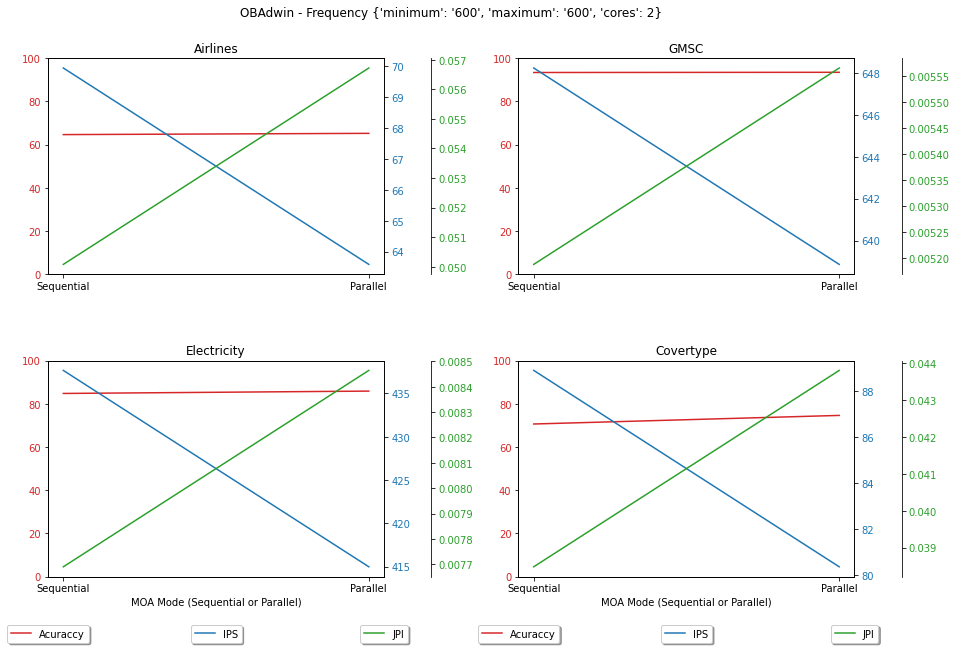

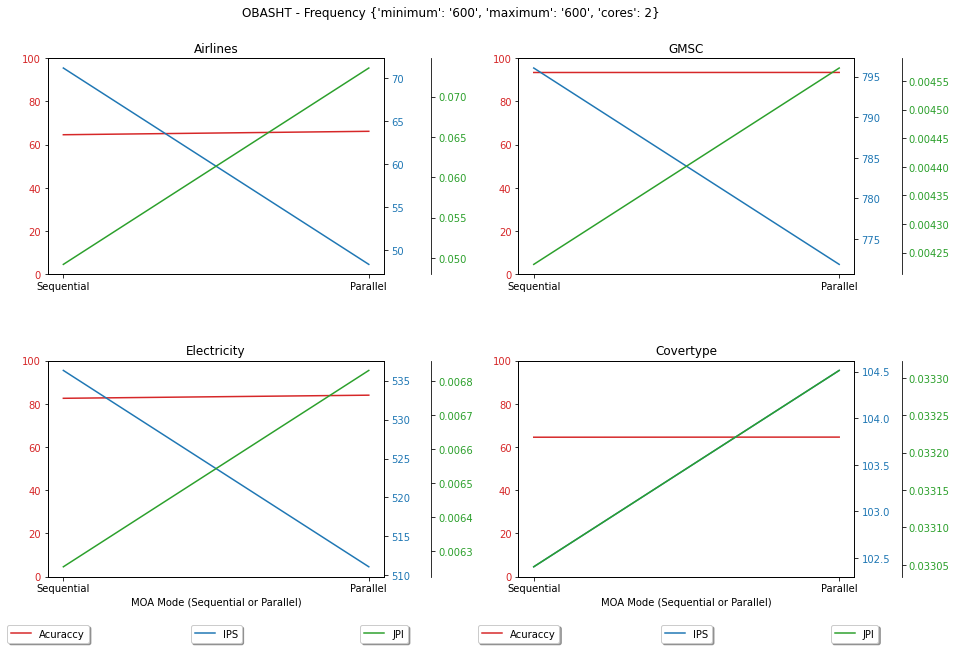

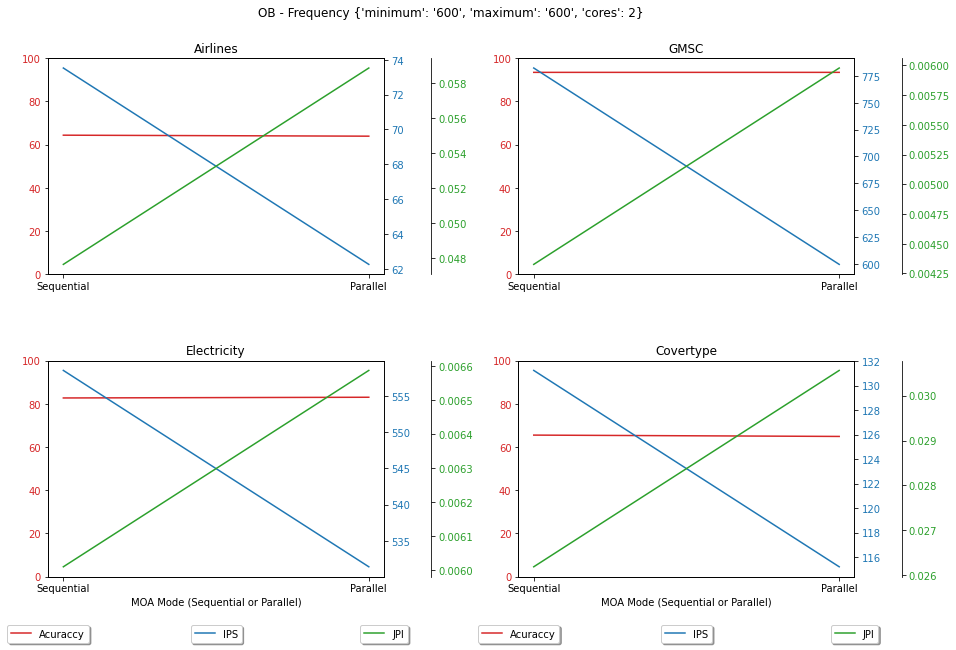

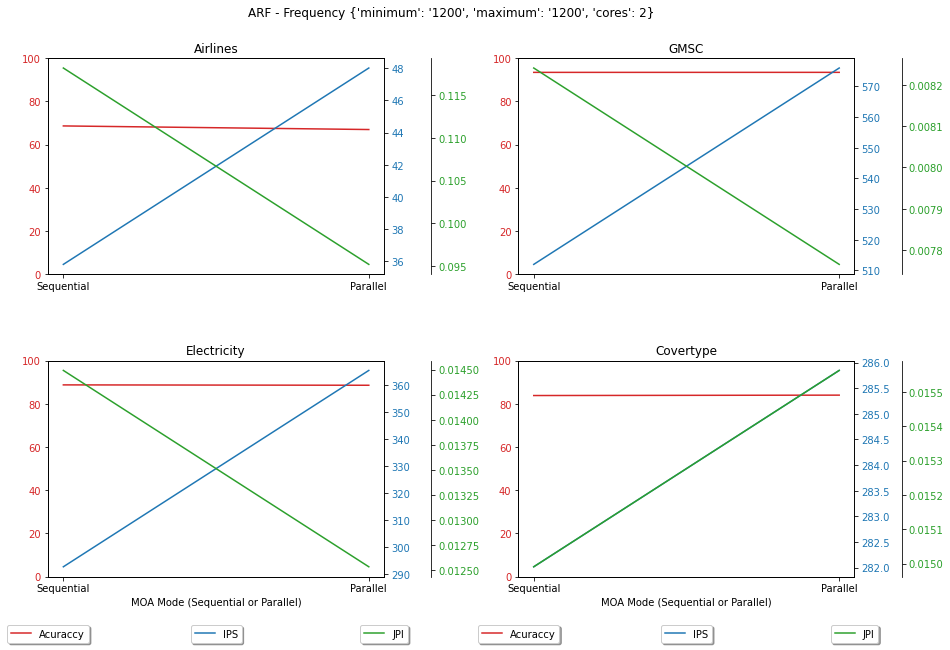

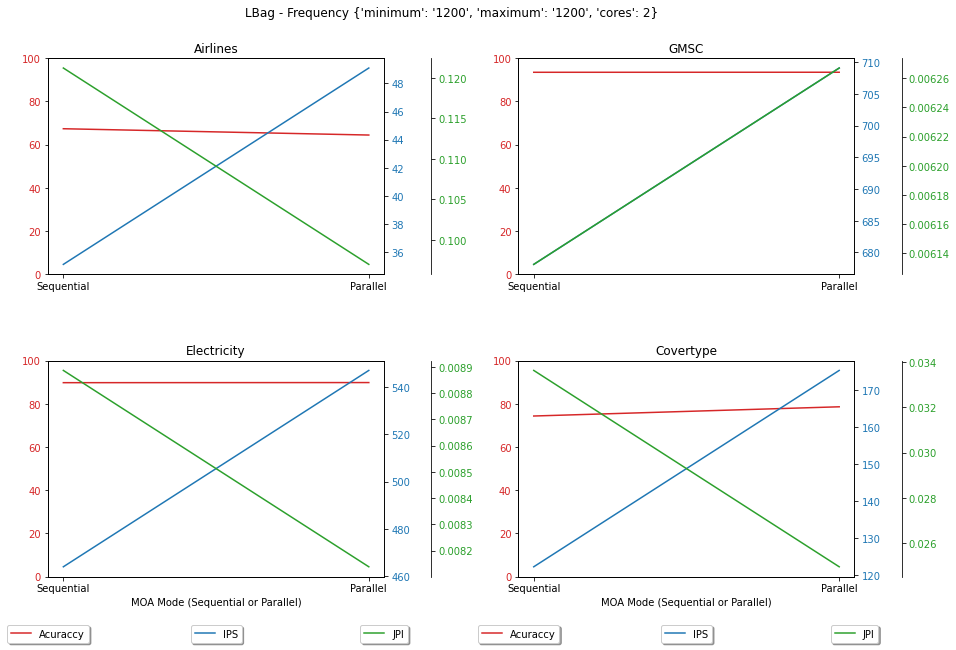

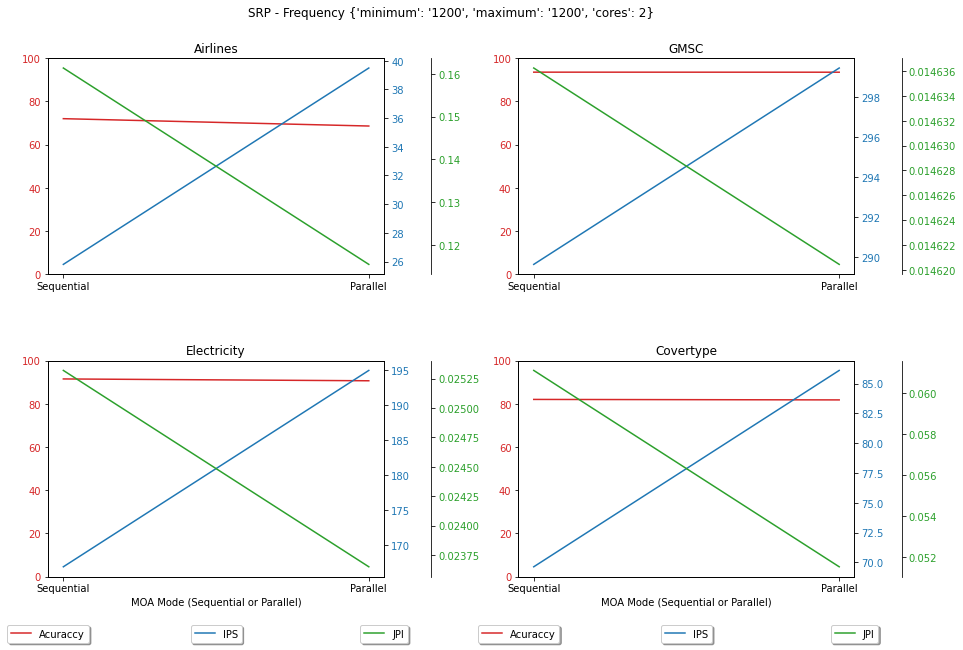

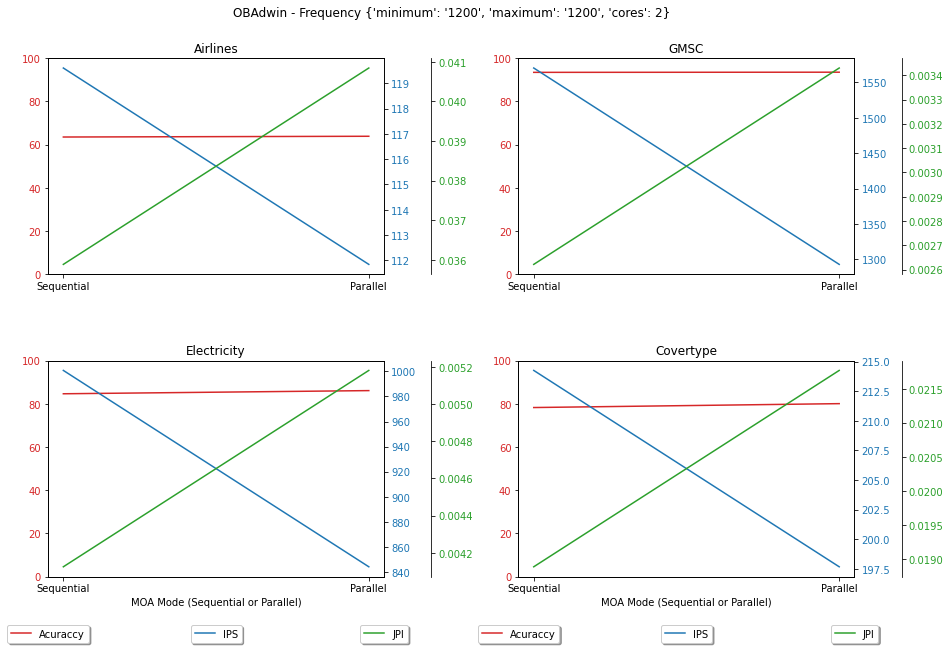

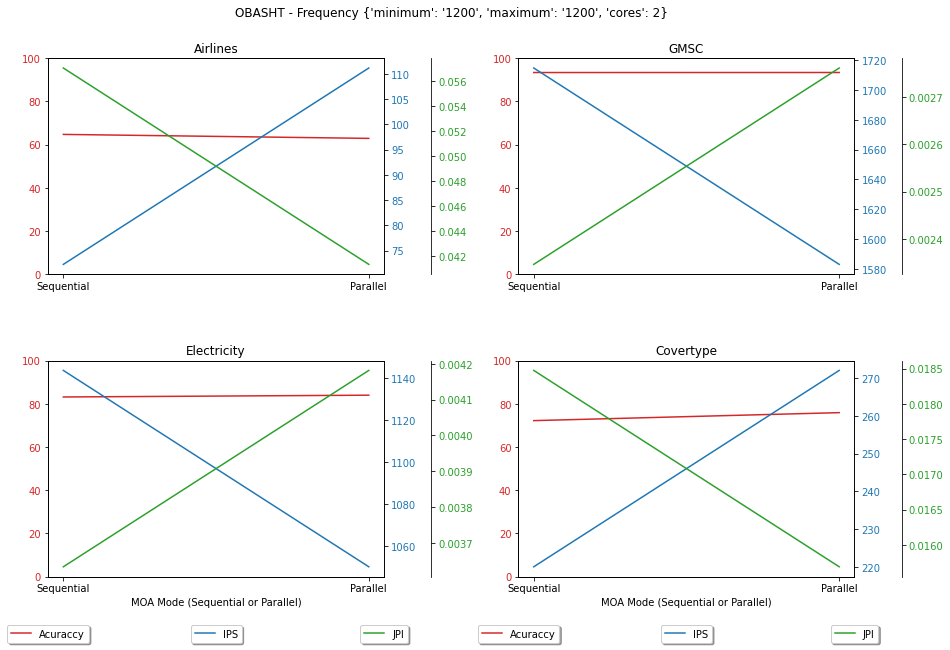

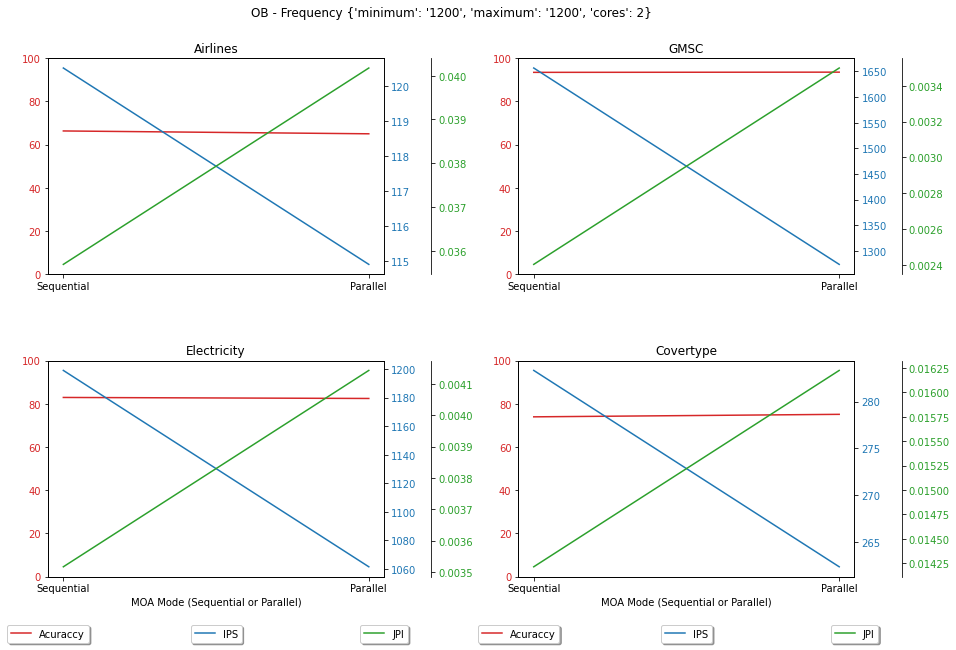

moaDF: 144    mdf: 144     sshDF: 144
moaDF: 144    mdf: 144     sshDF: 144



----------------- {'minimum': '600', 'maximum': '600', 'cores': 4} -----------------


/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df["algorithm"].str.replace("OB$", "OBSequential")
/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df['algorithm'].str.replace("Adwin$", "AdwinSequential")
/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df['algorithm'].str.replace("SRP$", "SRPSequential")
/var/folders/bq/x5n78dm15dz0whvgzf_nj9j80000gp/T/ipykernel_17472/3478987594.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['algorithm'] = df['algorithm'].str.replace("OBASHT$", "OBASHTSequent




----------------- {'minimum': '1200', 'maximum': '1200', 'cores': 4} -----------------


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


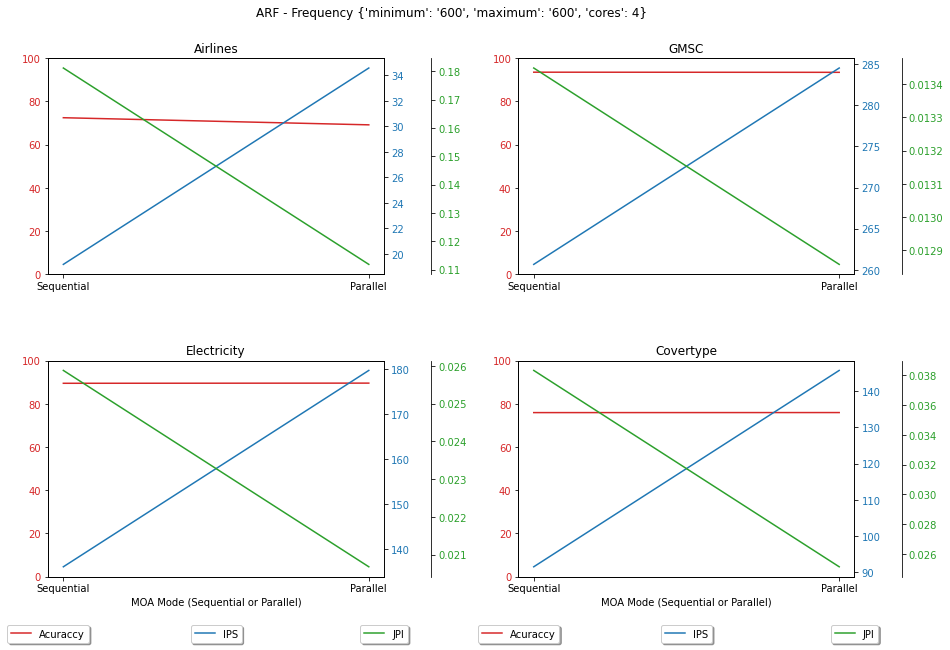

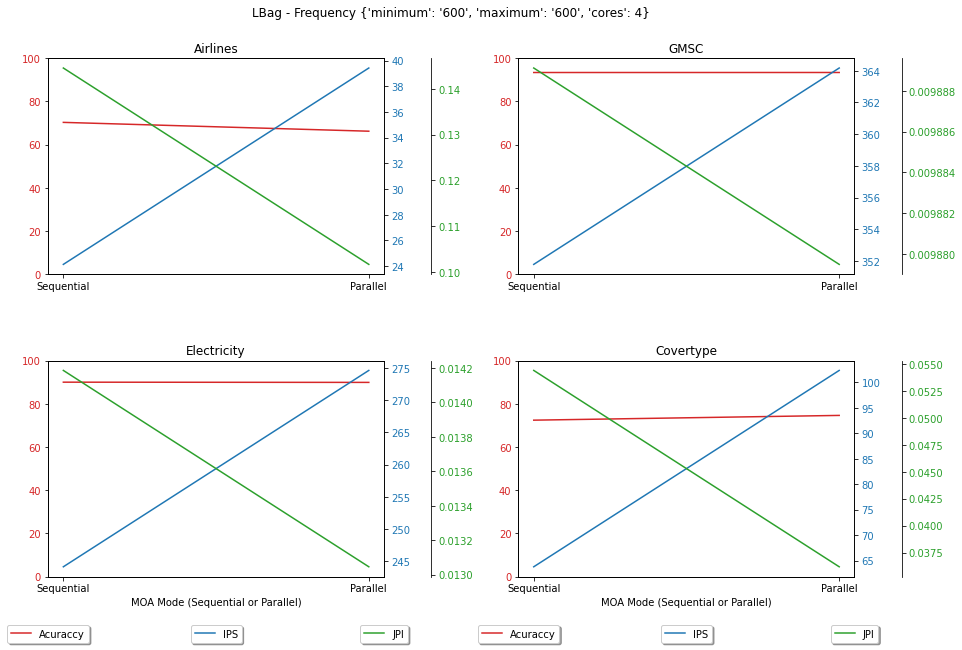

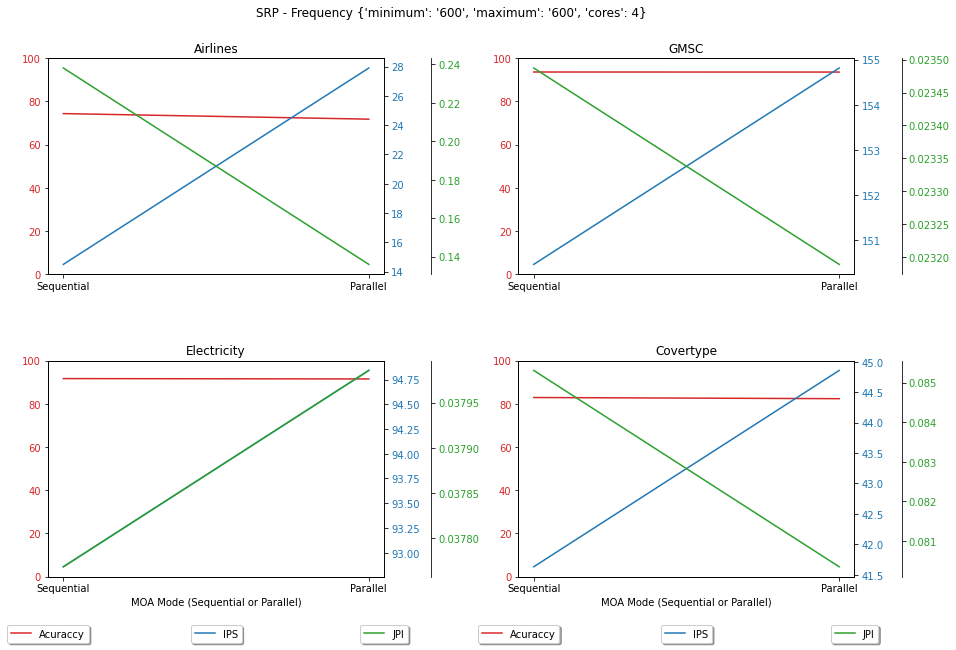

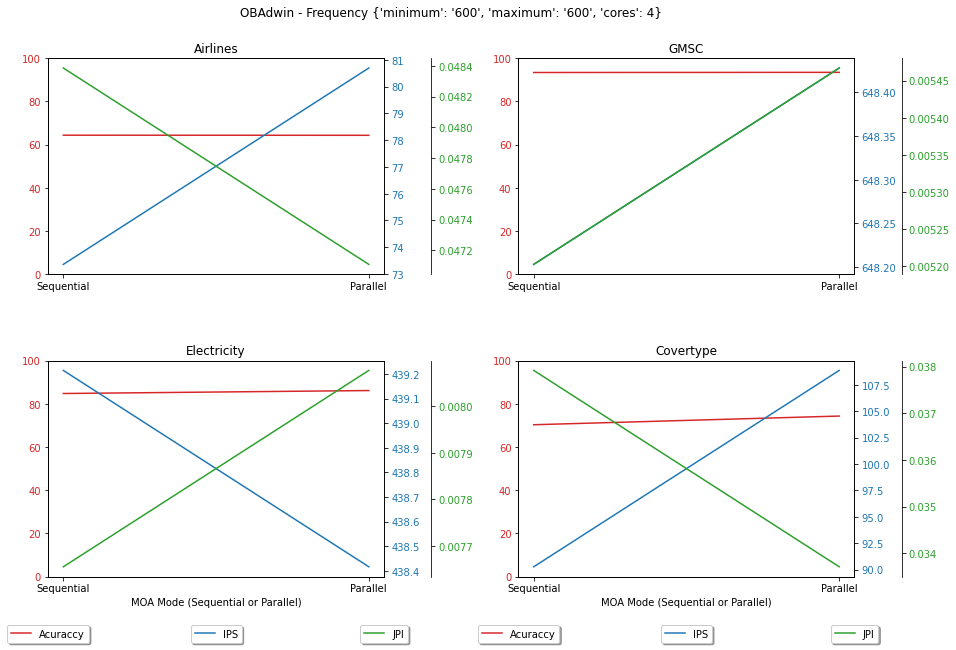

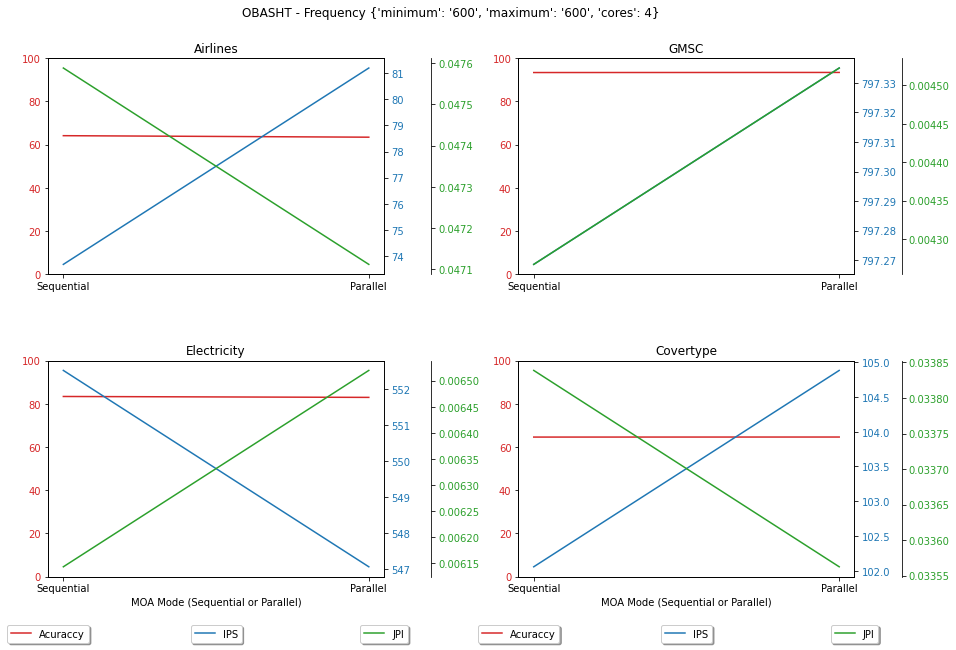

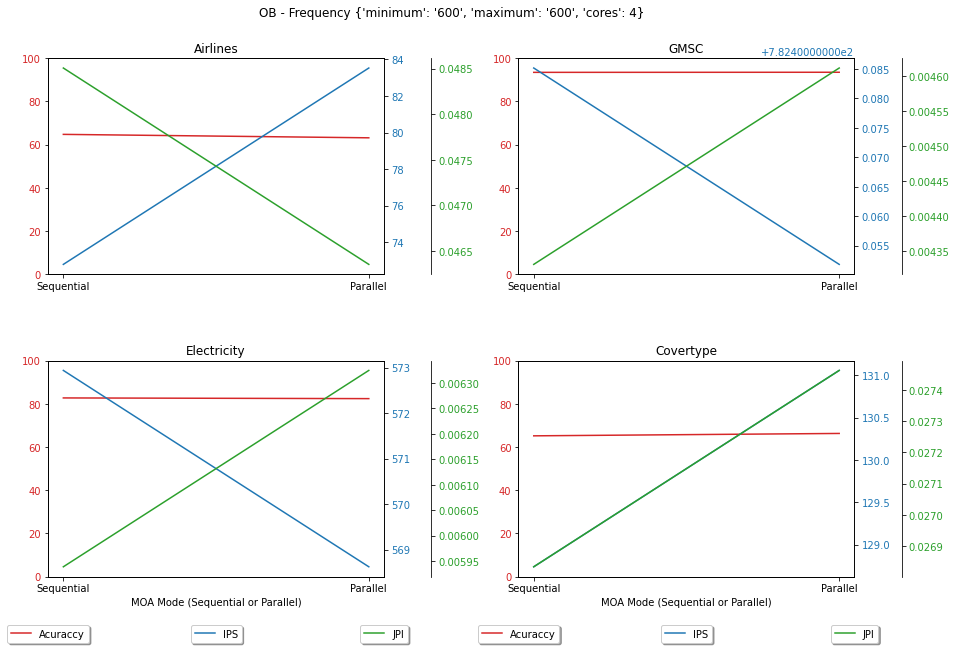

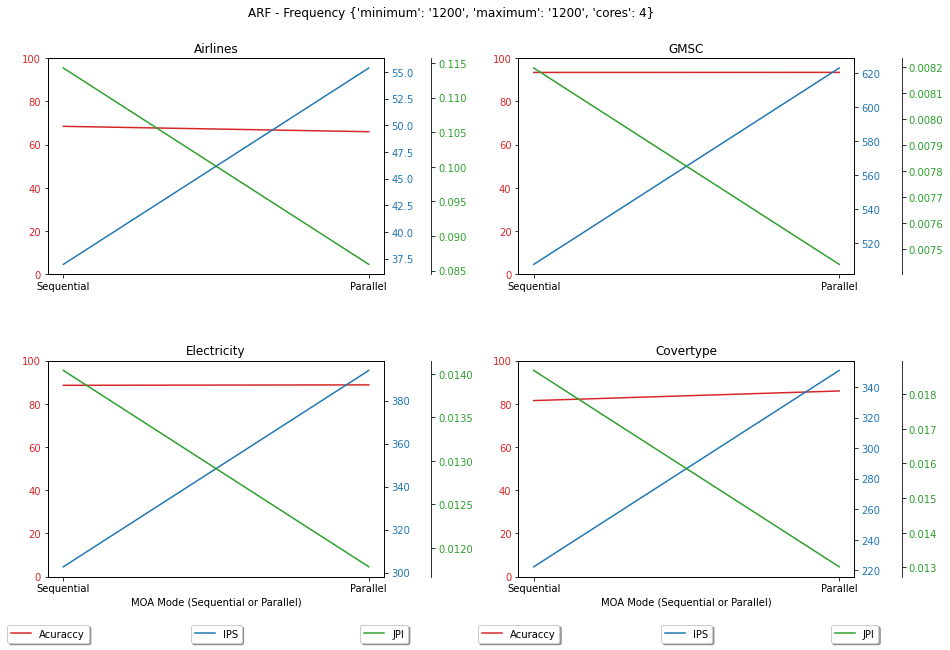

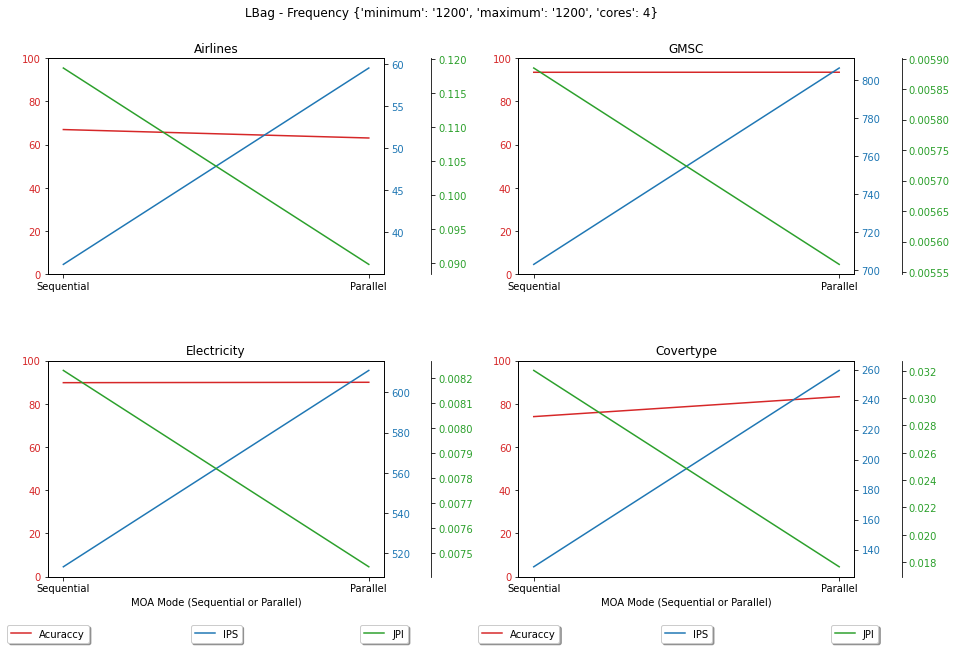

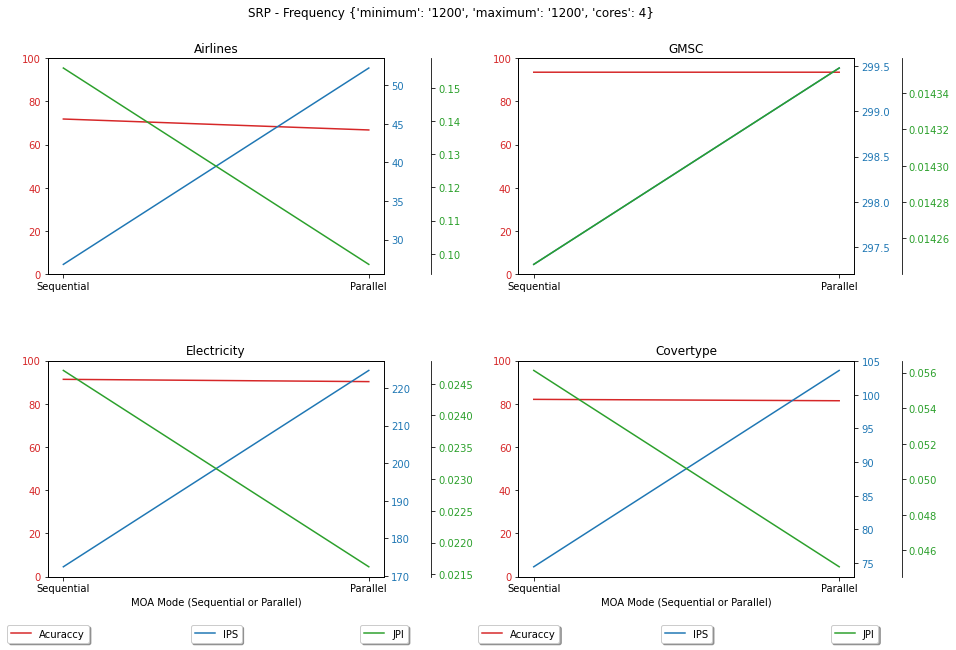

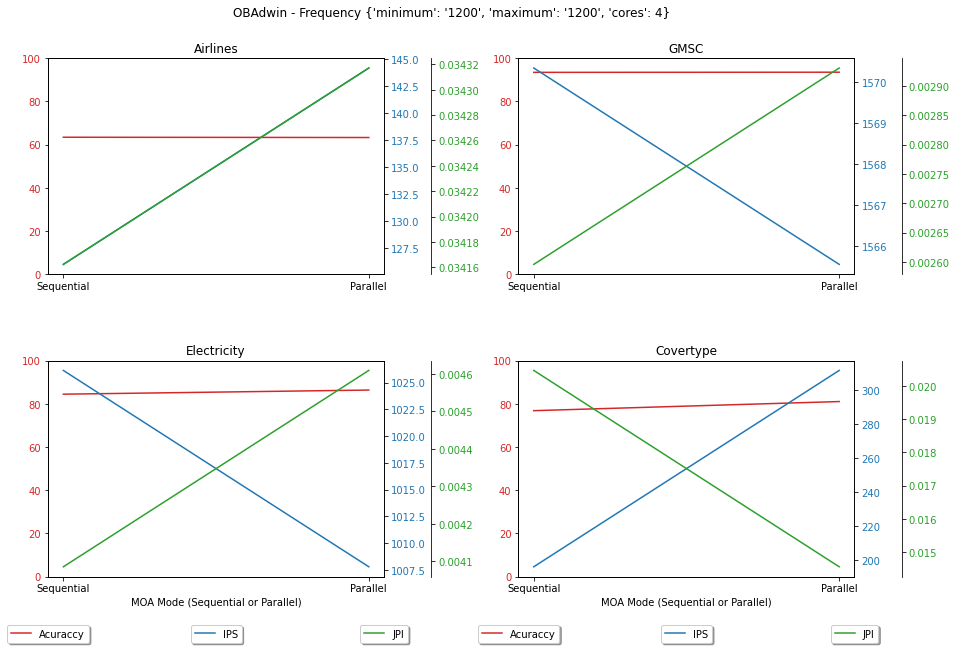

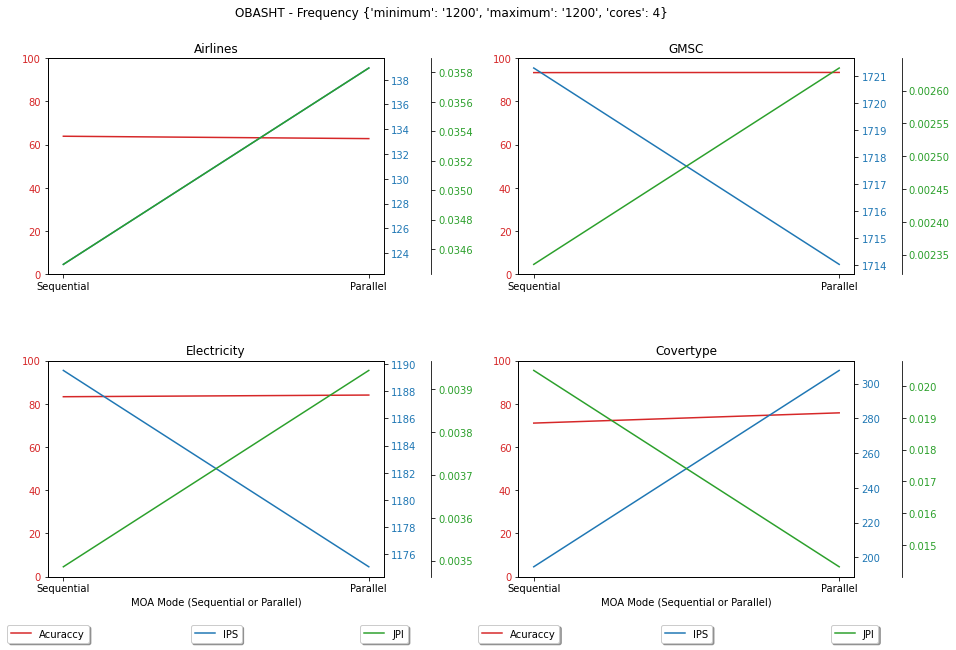

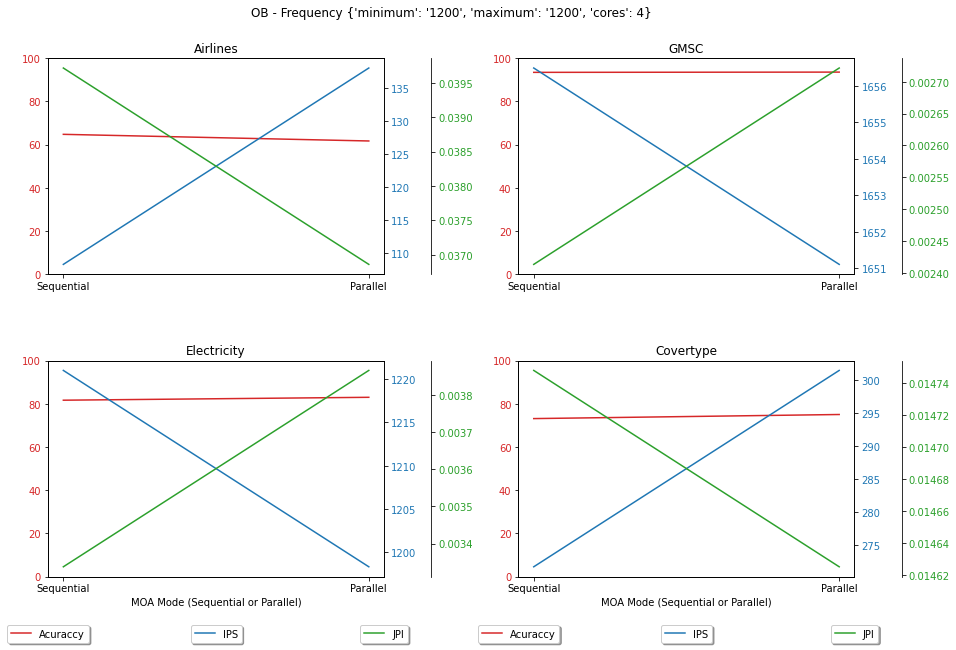

In [6]:
%run "/Users/reginaldoluisdeluna/Documents/Ufscar/comparison-xue3m-minibatching/notebooks/XUE3M.ipynb"

# Analise precisão 600x600

Essa analise consiste em validar se a acurácia dos algoritmos permanence com a mesma qualidade com a frequencia alterada. Para analisar utilizamos dois tipos de implementação dos algoritmos a sequencial MOA padrão e a paralela implementação feita por Cassales. O comportamento da precisão e recall entre os dois algorimtos se mantem para determinados algoritmos como OzaBaga para os datasets GMSC por exemplo, mas outros datasets como Covertype e eletriticy a precisão aumenta já para o algoritmo LBAG a precisão cai consideravelmente de 80 para 70 assim mas isso apenas no dataset GMSC.

# Analise precisão 1200x1200

O comportamento é identico na frequencia anterior de 600x600.

# Consumo energético para 2 cores

Nestes gráficos podemos observar o consumo energético para a frequencia minima de 600 com a frequencia maxima de 600 e também para as frequencias minima de 1200 com a frequencia máxima de 1200. As duas barras são em azul o algoritmo sequencial sem alteração e a em laranja o paralelo com alteração. Os comportamentos destes algoritmos em geral são em questão de eficiencia energética muito similares, salvo algumas exceções como o streaming random patches que teve um ganho em eficiencia ao ser implementado o algoritmo paralelo nas taxas de 50% e 90%. Para analisar a diferença energética entre as frequencias iremos fixar a analise no OzaBag que já foi comprovado ter um melhor desempenho energético por conta da sua estrutura de dados. No OzaBag no dataset airlines o maior consumo em JPI foi de 0.1 já para a maior frequencia isso ficou em 0.05.  Pegando o proximo dataset GMSC temos que o maior consumo ficou em um pouco mais de 0.025 e na frequencia maior em 0.02, no dataset electNormNew ficou em 0.05 e 0.02, já no covTypeNorm isso ficou em 0.2 e 0.10. No geral a utilização de uma frequencia menor não trouxe grandes impactos em menor consumo energético para essa execução.

## Analise acuracia x IPS x JPI

Nesta seção do notebook iremos analisar o comportamento em relação a acuracia e os valores de instancias por segundo (IPS) e os Joules por instancia (JPI). Para essa analise irei fixar novamente no algoritmo OzaBag nas frequencias minimas e máximas. Começando pela frequencia minima o comportamento do Ozabag tem uma linha reta em relação a acurácia em todos os datasets e também um comportamento onde quanto maior o IPS menor o JPI. O maior IPS foi de 880 com um JPI máximo de 0.0044 isso para o dataset GMSC. Na frequencia máxima, a acurácia e o comportamento se replica, mas temos uma diferença nos valores de processamento, novamente no dataset GMSC temos um processamento máximo de 1650 instancias por segundo e o maior JPI em 0.0034. Esse número representa o dobro de instancias processadas por segundo com um valor de JPI muito próximo ao de menor frequência.

Ainda na mesma analise iremos olhar agora o algoritmo StreamingRandomPatches por ser o que teve o maior consumo energético em todas as chamadas. Na frequencia minima o SRP tem o maior IPS em 165 e JPI em 0.24 nos datasets GMSC e Airlines. Já na frequencia máxima, o maior IPS foi de 298 e o JPI de 0.16 também para os datasets GMSC e Airlines. No dataset GMSC o maior JPI ficou em 0.014636 na frequencia máxima e na minima de 0.0245, isso mostra que mesmo o JPI sendo maior na frequencia minima isso reflete muito em quantos IPS terão na execução.

# Consumo energético para 4 cores

Nestes gráficos podemos observar o consumo energético para a frequencia minima de 600 com a frequencia maxima de 600 e também para as frequencias minima de 1200 com a frequencia máxima de 1200. As duas barras são em azul o algoritmo sequencial sem alteração e a em laranja o paralelo com alteração. Os comportamentos destes algoritmos em geral são em questão de eficiencia energética muito similares, salvo algumas exceções como o streaming random patches que deve um ganho em eficiencia ao ser implementado o algoritmo paralelo nas taxas de 50% e 90%. Para analisar a diferença energética entre as frequencias iremos fixar a analise no OzaBag que já foi comprovado ter um melhor desempenho energético por conta da sua estrutura de dados. As execuções também se comporta com uma aparencia muito similar ao resultado de 2 cores. O ganho energético entre utilização de frequencias menores o maiores não trazem muita diferença entre os valores finais.

## Analise acuracia x IPS x JPI

Nesta seção do notebook iremos analisar o comportamento em relação a acuracia e os valores de instancias por segundo (IPS) e os Joules por instancia (JPI). Para essa analise irei fixar novamente no algoritmo OzaBag nas frequencias minimas e máximas. Iniciando pela frequencia minima  temos que o maior IPS foi de 897 com um valor máximo de JPI de 0.00410 no mesmo dataset, na frequencia máxima os valores do IPS máximo foi de 1656 e JPI de 0.00270. 

Olhando outro algoritmo, SRP, temos que o maior IPS na frequencia minima ficou de 180 no dataset GMSC com um JPI máximo neste dataset de 0.0240, já na frequencia máxima para o mesmo dataset e algoritmo, temos um IPS de 299 com JPI de 0.01434. Novamente mostrando que mesmo a frequencia minima consumindo mais em geral, para o consumo por instancia o JPI para frequencias maiores é melhor pois consegue processar muito mais instancias utilizando um valor próximo de JPI.

# Consumo energético entre 4 e 2 cores

Se olhamos o que mais consumiu em 2 cores foi o algoritmo StreamingRandomPatches na frequencia 600x600 com o consumo de JPI em 0.30 agora olhando o que maior consumiu em 4 cores também foi o mesmo algoritmo na mesma frequencia. A média de frequencia entre os cores ficaram muito similares em ambos cores. O que está bem diferente é o consumo médio em relação a frequencia menores, de acordo com a literatura o ganho energético se daria quando utilizassemos frequencias menores. Porém, podemos observar que mesmo não consumindo menos energia o core com as frequencias maiores podem processar muito mais instancias por segundo (IPS) trazendo mais ganho energético.

# Melhor resultado MiniBatching vs Melhor resultado XUE3M

# Conclusão

As perguntas que gostariamos de responder com esses experimentos estão descritas no inicio desde notebook, como, qual core e qual frequencia tem o melhor ganho em performance e energia, mudar os valores de frequencia e os cores disponiveis afetam a qualidade preditiva do software e em relação ao mini-batching utilizar as técnias de DPM e DVFS utilizadas aqui melhoram o consumo energético. Neste sentido, olhamos os dados disponiveis e gerados, e observamos alguns fatos como ao contrário do que era esperado o JPI não ficou menor ao utilizar frequencias menores ou menos cores disponiveis. Mas ao utilizar essas frequencias menores consumimos a mesma quantidade de energia ou muito proximas quando utilizamos mais recursos como mais cores e mais frequencia, pois com mais recursos foi possivel processar o dobro de informação utilizando menos JPI. 

A qualidade preditiva em todas as execuções mesmo mudando os valores de frequencia e cores disponiveis se mantém, a qualidade só é perdida quando utilizamos o MOA paralelo, mas independente da execução é mantido sua qualidade a execução anterior. Em relação ao número de cores disponivei podemos ver que não há grande diferença sobre o número de JPI nem o número de IPS. Na minima frequencia com 2 cores foi possivel processar um IPS de 880 já em 4 cores esse número ficou em 897, com o JPI respectivamente em 0.0044 e 0.00410, e na frequencia máxima, para 2 cores o IPS ficou em 1650 e para 4 cores 1656, com o JPI de 0.0034 e 0.00270.

Em relação aos resultados do mini-batching temos a qualidade preditiva se mantém utilizando as frequencias menores ou maiores, e por vez superiores, já que o mini-batching em alguns algoritmos perde a sua qualidade preditiva. No consumo energético geral, temos que o maior consumo foi referente ao SRP em uma taxa de saída de 90% no dataset airlines com um JPI de 0.25, já para 2 cores o maior consumo ficou em 0.35 para a frequencia de 1200x1200 e em 4 cores também 0.35 na frequencia máxima. Na analise individual do IPS por algoritmo o OzaBag do mini-batching tem um IPS máximo de 3700 e de JPI em 0.00170 que é muito maior do que a melhor execução das frequencias máximas e minimas e dos cores disponiveis.


## 